# 데이터 준비

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
len(perch_length), len(perch_weight)

(56, 56)

In [4]:
import matplotlib.pyplot as plt

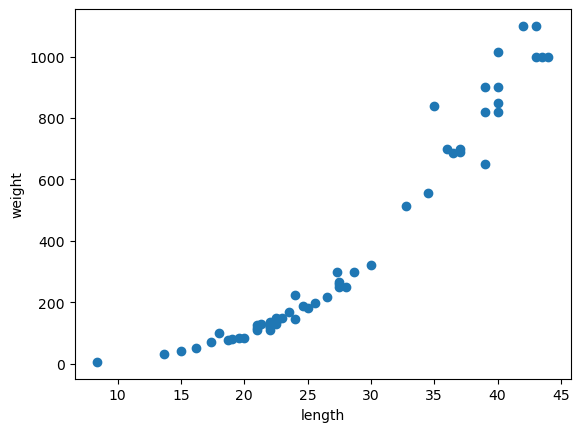

In [5]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [19]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

## 차원변환

In [20]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [21]:
# k-최근접 모델을 학습시키기 위해서 특성값이 2차원 배열이 되어야하기 때문에 아래와 같이 차원을 바꾼다.
# 일반적으로 특성은 N개이기 때문이다.
# reshape: (-1,1) 열의 차원을 1로 고정하고 행은 데이터에 맞게 재할당하겠다는 의미
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [22]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 선형회귀 평가 방식
 * 분류 모델은 평가를 정확도로 하지만 선형회귀모델은 정확도 이외에 다양한 방식으로 평가
 * k 최근접 모델은 R 스퀘어 방식으로 평가하는 score 함수를 제공함
 * $ R^2$ (결정 계수)
 * R 스퀘어 값은 정답률이 아니다. 얼마나 타깃에 근접한 결과를 냈는지를 표현하는 평가방식이다.
 * 정확히 예측할 수록 1에 가까운 값을 예측한다.

In [23]:
# 일반적으로 분류모델은 ....Classifier함수, 선형회귀모델은 .....Regressor함수를 사용
from sklearn.neighbors import KNeighborsRegressor

In [24]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [25]:
knr.score(test_input, test_target)

0.992809406101064

## 평균절대오차(MAE:Mean Absolue Error) 방식으로 평가
 * 값이 적을수록 예측값이 실제값에 수렴하여 예측했다고 볼 수 있다.

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절대값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합(Overfitting) vs 과소적합(Underfitting)
 * 과대적합
    - 훈련셋의 결과가 테스트셋 결과보다 좋게 나오는 경우
    - 너무 많은 데이터로 학습이 된 경우 => 모델이 훈련셋에 지나치게 최적화 된 경우
    - 모델이 훈련셋에 맞게 하이퍼파라메터가 최적화 된 경우
 * 과소적합
    - 테스트셋의 결과가 훈련셋 결과보다 좋게 나오는 경우
    - 너무 적은 데이터로 학습이 된 경우 => 학습데이터가 적어서 우연히 훈련결과가 좋게 나온 경우
    - 모델의 하이퍼파라메터가 최적화 되지 않은 경우 발생가능

### 가장 좋은 것은 훈련셋의 결과와 테스트셋의 결과가 거의 동일해야 한다.
    - 훈련셋의 결과와 테스트셋 결과의 간극을 줄이려는 노력을 해야한다.

In [30]:
### 훈련셋 평가결과

In [31]:
print(knr.score(train_input, train_target))

0.9698823289099254


### 테스트셋 평가결과

In [33]:
print(knr.score(test_input, test_target))

0.992809406101064


In [35]:
# k-최근접 이웃 회귀 객체를 만듭니다.
knr = KNeighborsRegressor()

In [36]:
from operator import itemgetter
score_info = []
for n in range(1,42+1):
    n_data = {}
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    train_score = knr.score(train_input, train_target)
    test_score = knr.score(test_input, test_target)
    
    n_data['n_neighbors'] = n
    n_data['train_score'] = train_score
    n_data['test_score'] = test_score
    n_data['score_difference'] = abs(train_score - test_score)
    
    score_info.append(n_data)

In [37]:
score_info[:10]

[{'n_neighbors': 1,
  'train_score': 0.9852830341215901,
  'test_score': 0.991309195814175,
  'score_difference': 0.006026161692584853},
 {'n_neighbors': 2,
  'train_score': 0.9828437127041165,
  'test_score': 0.9725010241788556,
  'score_difference': 0.010342688525260879},
 {'n_neighbors': 3,
  'train_score': 0.9804899950518966,
  'test_score': 0.9746459963987609,
  'score_difference': 0.005843998653135674},
 {'n_neighbors': 4,
  'train_score': 0.978211389719245,
  'test_score': 0.9840231023848637,
  'score_difference': 0.00581171266561864},
 {'n_neighbors': 5,
  'train_score': 0.9698823289099254,
  'test_score': 0.992809406101064,
  'score_difference': 0.022927077191138623},
 {'n_neighbors': 6,
  'train_score': 0.9757140960298665,
  'test_score': 0.9855001139899048,
  'score_difference': 0.009786017960038307},
 {'n_neighbors': 7,
  'train_score': 0.9761170732051527,
  'test_score': 0.9781383949643516,
  'score_difference': 0.002021321759198891},
 {'n_neighbors': 8,
  'train_score': 0

### 훈련데이터 점수 Top5

In [40]:
sorted(score_info, key = itemgetter('train_score'), reverse = True)[:5]

[{'n_neighbors': 1,
  'train_score': 0.9852830341215901,
  'test_score': 0.991309195814175,
  'score_difference': 0.006026161692584853},
 {'n_neighbors': 2,
  'train_score': 0.9828437127041165,
  'test_score': 0.9725010241788556,
  'score_difference': 0.010342688525260879},
 {'n_neighbors': 3,
  'train_score': 0.9804899950518966,
  'test_score': 0.9746459963987609,
  'score_difference': 0.005843998653135674},
 {'n_neighbors': 4,
  'train_score': 0.978211389719245,
  'test_score': 0.9840231023848637,
  'score_difference': 0.00581171266561864},
 {'n_neighbors': 7,
  'train_score': 0.9761170732051527,
  'test_score': 0.9781383949643516,
  'score_difference': 0.002021321759198891}]

### 시험데이터 점수 Top5 

In [41]:
sorted(score_info, key = itemgetter('test_score'), reverse = True)[:5]

[{'n_neighbors': 5,
  'train_score': 0.9698823289099254,
  'test_score': 0.992809406101064,
  'score_difference': 0.022927077191138623},
 {'n_neighbors': 1,
  'train_score': 0.9852830341215901,
  'test_score': 0.991309195814175,
  'score_difference': 0.006026161692584853},
 {'n_neighbors': 6,
  'train_score': 0.9757140960298665,
  'test_score': 0.9855001139899048,
  'score_difference': 0.009786017960038307},
 {'n_neighbors': 4,
  'train_score': 0.978211389719245,
  'test_score': 0.9840231023848637,
  'score_difference': 0.00581171266561864},
 {'n_neighbors': 7,
  'train_score': 0.9761170732051527,
  'test_score': 0.9781383949643516,
  'score_difference': 0.002021321759198891}]

### 훈련데이터, 시험데이터 차이가 적은 순서5 

In [42]:
sorted(score_info, key = itemgetter('score_difference'))[:5]

[{'n_neighbors': 9,
  'train_score': 0.9693310367551284,
  'test_score': 0.9692647749722698,
  'score_difference': 6.626178285862316e-05},
 {'n_neighbors': 35,
  'train_score': 0.39364532094316596,
  'test_score': 0.3932185740967612,
  'score_difference': 0.00042674684640475746},
 {'n_neighbors': 7,
  'train_score': 0.9761170732051527,
  'test_score': 0.9781383949643516,
  'score_difference': 0.002021321759198891},
 {'n_neighbors': 34,
  'train_score': 0.4318523822450875,
  'test_score': 0.4347189526409505,
  'score_difference': 0.0028665703958630218},
 {'n_neighbors': 4,
  'train_score': 0.978211389719245,
  'test_score': 0.9840231023848637,
  'score_difference': 0.00581171266561864}]

### 어떤 기준으로 하이퍼파라메터를 선정할 것인가?
* 절대적인 기준은 아님 하나의 예로 볼 것.
* 훈련데이터와 시험데이터 점수 차이가 작아야 한다.
* 훈련데이터 점수가 시험데이터 점수보다 크다
* 그 중에서 시험데이터 점수가 가장 커야 한다.

# k-최근접 이웃의 한계

In [46]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [48]:
from sklearn.model_selection import train_test_split

# 훈련세트와 테스트세트로 나눕니다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

# 훈련세트와 테스트세트를 2차원 배열로 바꿉니다.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)
# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [50]:
print(knr.predict([[50]]))

[1033.33333333]


## 예측값과 실제값의 차이가 크다.

In [55]:
import matplotlib.pyplot as plt

In [57]:
# 50cm 농어의 이웃을 구합니다.
distance, indexes = knr.kneighbors([[50]])
distance, indexes

(array([[6., 7., 7.]]), array([[34,  8, 14]], dtype=int64))

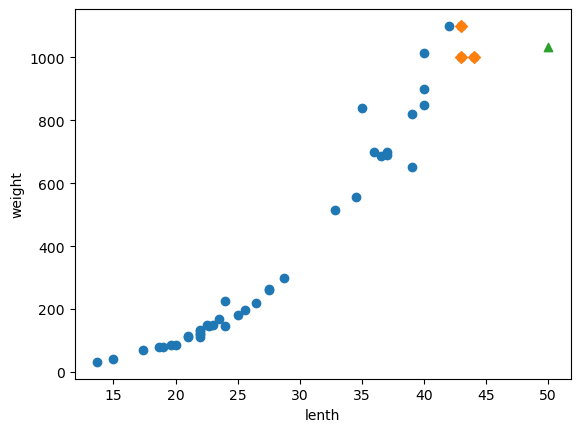

In [59]:
# 훈련세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)
# 훈련세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker ='D')
# 50cm 농어 데이터를 그립니다.
plt.scatter(50,1033,marker = '^')
plt.xlabel('lenth')
plt.ylabel('weight')
plt.show()

In [60]:
print(np.mean(train_target[indexes]))

1033.3333333333333


### 50cm의 농어의 무게 예측값의 차이를 설명할 수 잇는가?
### 그렇다면 현재 모델에서 100cm의 농어의 예측값은 어떻게 될까?

In [62]:
print(knr.predict([[100]]))

[1033.33333333]


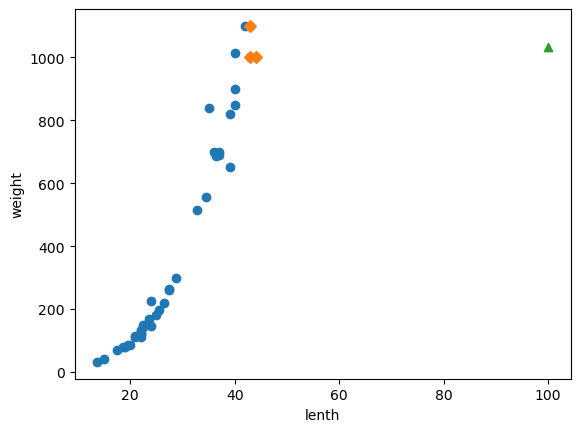

In [63]:
# 100cm 농어의 이웃을 구합니다.
distance, indexes = knr.kneighbors([[100]])

# 훈련세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)
# 훈련세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
# 100cm 농어의 데이터를 그립니다.
plt.scatter(100, 1033, marker = '^')
plt.xlabel('lenth')
plt.ylabel('weight')
plt.show()

## 선형회귀

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()
# 선형회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [66]:
# 50cm 농어에대한 예측 무게
print(lr.predict([[50]]))

[1241.83860323]


In [67]:
print(lr.predict([[100]]))

[3192.69585141]


In [68]:
# coefficient : 선형계수 => Target(label)에 미치는 영향력, 기울기정도. +면 우상향, -면 우하향
# intercept : 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


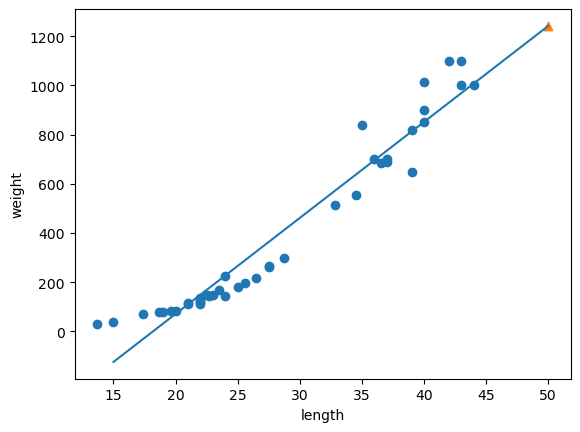

In [70]:
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다.
# [15, 50] => 15 : 방정식의 x축 시작점, 50 : 방정식의 x축 종료점
# [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_] : 15의 y값, 50의 y값
plt.plot([15,50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [71]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


### 위 결과에서 1차방정식 기반 선형회귀의 장점 및 문제점을 생각해 보자

* 장점: 훈련되지 않은 추세에 대한 예측 가능
* 문제점: 존재하지 않는 음수값을 예측할 수도 있다.
          2차 방정식 패턴의 실제 데이터를 예측할 경우 feature 값이 커질수록 모델 성능이 떨어진다.

## 다항 회귀 (Polynomial Regression)

In [73]:
# 다항 회귀를 위해 길이의 제곱값을 별도로 만들어준다.
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [75]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [76]:
train_poly[:5]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

In [77]:
test_poly[:5]

array([[ 70.56,   8.4 ],
       [324.  ,  18.  ],
       [756.25,  27.5 ],
       [453.69,  21.3 ],
       [506.25,  22.5 ]])

In [78]:
# 기존의 LinearRegression 모델을 그대로 사용하고 다항 정보만 입력해 준다.
# LinearRegression은 입력값에따라 자동적으로 N차 방정식 모델을 만들어준다.
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [79]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


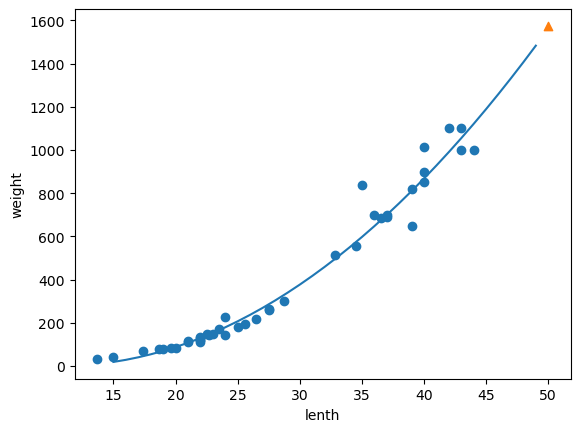

In [80]:
# 구간별 직선을 그리기 위해 15에서 49까지 정부 배열을 만듭니다.
point = np.arange(15, 50)
# 훈련세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)
# 15에서 49까지 2차방정식 그래프를 그립니다.
plt.plot(point, 1.01 * point **2 -21.6 * point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker = '^')
plt.xlabel('lenth')
plt.ylabel('weight')
plt.show()